In [3]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from Landscapes import *
import pandas as pd
import numpy
import sklearn
from sklearn.preprocessing import PolynomialFeatures
import multiprocessing as mp
from sklearn.linear_model import LinearRegression



In [5]:
def create_dotSpace(N=10,hypers=[1,1,1,1,1,1,1,1,1,1],masked=False, mask=None):
    our_dirichlet = stats.dirichlet(hypers)    
    all_permutations = list(itertools.product([0,1],repeat = N))
    fitnesses = []
    perms = []
    transformed_locs = []
    for perm in all_permutations:
        fitnesses.append(np.dot(perm,our_dirichlet.rvs()[0]))
        if masked:
            if mask:
                perm = transform(perm,mask)
            else:
                perm = transform(perm)
        perms.append("".join([str(i) for i in perm]))
        transformed_locs.append(perm)
    frame = {"Fitness":pd.Series(fitnesses,index=perms), "Location":pd.Series(transformed_locs,index=perms)}
    return pd.DataFrame(frame)

In [6]:
loc_list=['loc_0','loc_1', 'loc_2','loc_3','loc_4','loc_5','loc_6','loc_7','loc_8','loc_9',]


In [ ]:

#get polynomial interactions
poly = PolynomialFeatures(interaction_only=True,include_bias = False,degree=2)
x = poly.fit_transform(current_land[loc_list])
y = np.array(current_land.Fitness)
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
r_sq

In [ ]:
Hypers =[K,K,K,K,K,K,K,K,K,K]
current_dot_land = create_dotSpace(N,Hypers)
current_dot_land[loc_list] =pd.DataFrame(current_dot_land['Location'].tolist(), index=current_dot_land.index)   
#get polynomial interactions
poly = PolynomialFeatures(interaction_only=True,include_bias = False,degree=2)
x = poly.fit_transform(current_dot_land[loc_list])
y = np.array(current_dot_land.Fitness)
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
r_sq

In [7]:
def get_r_squared(Landscape,Poly_Degrees):
    #Expand and name locations
    loc_list=['loc_0','loc_1', 'loc_2','loc_3','loc_4','loc_5','loc_6','loc_7','loc_8','loc_9',]
    Landscape[loc_list] =pd.DataFrame(Landscape['Location'].tolist(), index=Landscape.index) 
    #get polynomial interactions
    poly = PolynomialFeatures(interaction_only=True,include_bias = False,degree=Poly_Degrees)
    x = poly.fit_transform(Landscape[loc_list])
    #run regression
    y = np.array(Landscape.Fitness)
    model = LinearRegression()
    model.fit(x, y)
    r_sq = model.score(x, y)
    return(r_sq)
                                     


In [8]:
def get_r_squared_dot(N,K,Poly_Degrees):
    print('new')

    R_Squared_Results=[]
    
    #generate 100 landcapes
    for I in range(100):
        concentration_params = [K,K,K,K,K,K,K,K,K,K]
        focal_landscape = create_dotSpace(N,concentration_params)
        R_Squared_Results.append(get_r_squared(focal_landscape,Poly_Degrees))
    R_Squared_Results=np.array(R_Squared_Results)
    return(R_Squared_Results.mean())

def get_r_squared_Kauffman(N,K,Poly_Degrees):
    print('new')
    R_Squared_Results=[]
    
    #generate 100 landcapes
    for I in range(100):
        focal_landscape = make_NK_land(N, K)
        R_Squared_Results.append(get_r_squared(focal_landscape,Poly_Degrees))
    R_Squared_Results=np.array(R_Squared_Results)
    return(R_Squared_Results.mean())

       


       



In [9]:
#Get a list of various data combinations to implement
Combinations = []
for k in range(1,10):
    for p_degree in range(1,4):
        Combinations.append([10,k,p_degree])


In [10]:
Combinations

[[10, 1, 1],
 [10, 1, 2],
 [10, 1, 3],
 [10, 2, 1],
 [10, 2, 2],
 [10, 2, 3],
 [10, 3, 1],
 [10, 3, 2],
 [10, 3, 3],
 [10, 4, 1],
 [10, 4, 2],
 [10, 4, 3],
 [10, 5, 1],
 [10, 5, 2],
 [10, 5, 3],
 [10, 6, 1],
 [10, 6, 2],
 [10, 6, 3],
 [10, 7, 1],
 [10, 7, 2],
 [10, 7, 3],
 [10, 8, 1],
 [10, 8, 2],
 [10, 8, 3],
 [10, 9, 1],
 [10, 9, 2],
 [10, 9, 3]]

In [ ]:
#loop across combinations to get the R_squared average, also pass in intially the K and the number of degrees
R_Squareds_Kauffman = [(x[1],x[2],get_r_squared_Kauffman(x[0],x[1],x[2])) for x in Combinations]

new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new


In [17]:
R_Squareds_Dot = [(x[1],x[2],get_r_squared_dot(x[0],x[1],x[2])) for x in Combinations]

new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new
new


In [21]:
Kauff_R_Squared = pd.DataFrame(R_Squareds_Kauffman,columns=['K','Polynomial_Degree','R_Squared'])
Kauff_R_Squared['Type']='Kauffman'
Dot_R_Squared = pd.DataFrame(R_Squareds_Dot,columns=['K','Polynomial_Degree','R_Squared'])
Dot_R_Squared['Type']='Dot'
DF_Combined = Dot_R_Squared.append(Kauff_R_Squared)

In [22]:
import matplotlib.pyplot as plt


In [35]:
DF_Combined.to_csv('R_Squared_By_Model_Dot_Kauffman.csv')

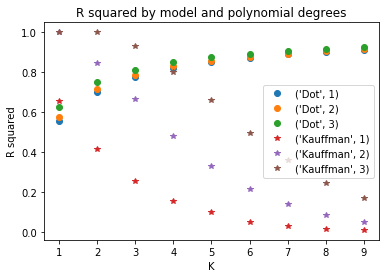

In [33]:
##plot it 
#plot by group
groups = DF_Combined.groupby(["Type",'Polynomial_Degree'])
for name, group in groups:
    if name[0]=='Dot':
        plt.plot(group["K"], group["R_Squared"], marker="o", linestyle="", label=name)
    else:
        plt.plot(group["K"], group["R_Squared"], marker="*", linestyle="", label=name)
plt.legend()

plt.title("R squared by model and polynomial degrees")

plt.xlabel("K")
plt.ylabel("R squared")
plt.savefig('RSquared_Polynomial_Regressions_Compare_Dot_Kauffman.png')

plt.show()